In [2]:
#remotes::install_github("jinworks/CellChat@88c2e13")

suppressPackageStartupMessages({
    library(CellChat)
    library(zellkonverter)
    library(SingleCellExperiment())
})



In [13]:
library(tidyr)
library(tibble)


Attaching package: ‘tidyr’


The following object is masked from ‘package:S4Vectors’:

    expand


The following object is masked from ‘package:igraph’:

    crossing



Attaching package: ‘tibble’


The following object is masked from ‘package:igraph’:

    as_data_frame




In [3]:
dist_out_dir <- "/home/workspace/spatial_mouse_lung_outputs/downstream_analysis/distance"
cellchat_out_dir <- file.path(dist_out_dir, "cellchat")

## Load cellchat results

In [4]:
# name = "HDM_day3"
# path =  file.path(cellchat_out_dir, paste0("cellchat_",name,".rds"))
# cellchat <- readRDS(path)

In [8]:
name = "HDM_day3"
path =  file.path(cellchat_out_dir, paste0("cellchat_trim05_",name,".rds"))
cellchat <- readRDS(path)

[1] "Tgfb1"       "Tgfb2"       "Tgfb3"       "Igf2"        "Ccl5"       
 [6] "Ccl4"        "Ccl3"        "Ccl19"       "Ccl21a"      "Cxcl9"      
[11] "Cxcl10"      "Cxcl13"      "Cxcl12"      "Cxcl16"      "Cx3cl1"     
[16] "Il2"         "Il4"         "Il7"         "Il15"        "Il21"       
[21] "Tslp"        "Il13"        "Il6"         "Il10"        "Il18"       
[26] "Il17a"       "Il17f"       "IL17AF"      "Ifng"        "Cd40lg"     
[31] "Spp1"        "C3"          "Flt3l"       "Col1a1"      "Fn1"        
[36] "Lama1"       "Lama2"       "Lama3"       "Lamb1"       "Lamc2"      
[41] "Lamc3"       "Reln"        "Vtn"         "Tnc"         "Vwf"        
[46] "Col4a1"      "Cd80"        "Cd86"        "Cdh1"        "Cdh5"       
[51] "Icam1"       "Icam2"       "Icosl"       "Jam2"        "F11r"       
[56] "Jam3"        "H2-Ab1"      "H2-DMb2"     "Dll1"        "Dll4"       
[61] "Cd274"       "Pdcd1lg2"    "Pecam1"      "Sell"        "Thy1"       
[66] "ITGA4_ITGB1" "ITGA9_ITGB1" "ITGA4_ITGB7"

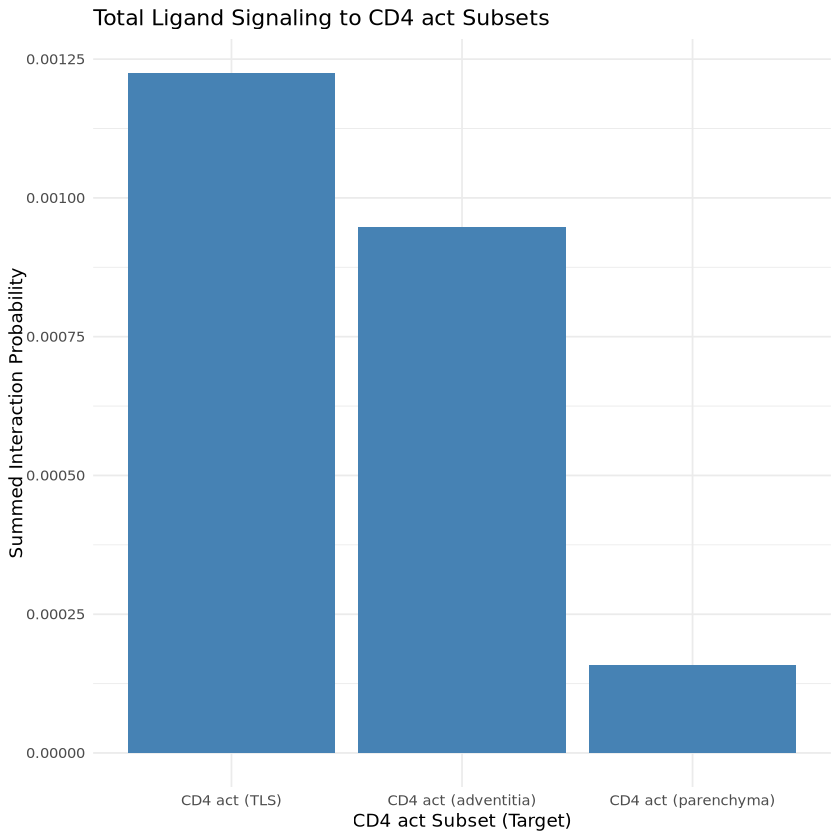

In [9]:
df.net <- subsetCommunication(cellchat)
# df.net[df.net$ligand == "Il33", ]

cd4_targets <- c('CD4 act (TLS)', 'CD4 act (parenchyma)', 'CD4 act (adventitia)')
df.net.cd4 <- df.net %>% filter(target %in% cd4_targets)
unique(df.net.cd4$ligand)
df.ligand <- df.net.cd4 %>% filter(ligand == "Ccl19")

df.ligand.summary <- df.ligand %>%
  group_by(target) %>%
  summarise(total_prob = sum(prob, na.rm = TRUE)) %>%
  ungroup()

ggplot(df.ligand.summary, aes(x = target, y = total_prob)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(
    title = "Total Ligand Signaling to CD4 act Subsets",
    x = "CD4 act Subset (Target)",
    y = "Summed Interaction Probability"
  ) +
  theme_minimal()

In [11]:
df.ligand

source,target,ligand,receptor,prob,pval,interaction_name,interaction_name_2,pathway_name,annotation,evidence
<fct>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>
Art,CD4 act (TLS),Ccl19,Ccr7,3.310066e-06,0.00,CCL19_CCR7,Ccl19 - Ccr7,CCL,Secreted Signaling,KEGG: mmu04060
B cell,CD4 act (TLS),Ccl19,Ccr7,5.920533e-06,0.00,CCL19_CCR7,Ccl19 - Ccr7,CCL,Secreted Signaling,KEGG: mmu04060
CD4 act (TLS),CD4 act (TLS),Ccl19,Ccr7,6.950157e-04,0.00,CCL19_CCR7,Ccl19 - Ccr7,CCL,Secreted Signaling,KEGG: mmu04060
CD4 act (adventitia),CD4 act (TLS),Ccl19,Ccr7,2.570125e-05,0.00,CCL19_CCR7,Ccl19 - Ccr7,CCL,Secreted Signaling,KEGG: mmu04060
CD4 act (parenchyma),CD4 act (TLS),Ccl19,Ccr7,1.245866e-06,0.00,CCL19_CCR7,Ccl19 - Ccr7,CCL,Secreted Signaling,KEGG: mmu04060
CD8 act,CD4 act (TLS),Ccl19,Ccr7,1.587274e-06,0.00,CCL19_CCR7,Ccl19 - Ccr7,CCL,Secreted Signaling,KEGG: mmu04060
Ccr7+ cDC2,CD4 act (TLS),Ccl19,Ccr7,2.305737e-05,0.00,CCL19_CCR7,Ccl19 - Ccr7,CCL,Secreted Signaling,KEGG: mmu04060
Ccr7- cDC2,CD4 act (TLS),Ccl19,Ccr7,2.765722e-05,0.00,CCL19_CCR7,Ccl19 - Ccr7,CCL,Secreted Signaling,KEGG: mmu04060
Col13a1+ fibroblast,CD4 act (TLS),Ccl19,Ccr7,1.845952e-05,0.00,CCL19_CCR7,Ccl19 - Ccr7,CCL,Secreted Signaling,KEGG: mmu04060


In [8]:
# netVisual_chord_gene(
#   cellchat,
#   signaling = "TGFb",
#   sources.use = NULL,
#   targets.use = c("CD4 act (TLS)", "CD4 act (parenchyma)", "CD4 act (adventitia)"),
#   lab.cex = 1.2
# )

In [18]:
capitalize <- function(x) {
  sapply(x, function(s) {
    paste0(toupper(substr(s, 1, 1)), tolower(substr(s, 2, nchar(s))))
  }, USE.NAMES = FALSE)
}

# now make a heatmap with all ligands and cluster by rows 

ligands <- unique(df.net.cd4$ligand)

# Step 1: Filter and summarize (already done)
cd4_targets <- c('CD4 act (TLS)', 'CD4 act (parenchyma)', 'CD4 act (adventitia)')

df.filtered <- df.net %>%
  filter(target %in% cd4_targets, ligand %in% ligands, pval < 0.05)

df.summary <- df.filtered %>%
  group_by(ligand, target) %>%
  summarise(total_prob = sum(prob, na.rm = TRUE), .groups = "drop")



# Step 2: Pivot to wide format (ligands as rows, targets as columns)
heatmap_matrix <- df.summary %>%
  pivot_wider(names_from = target, values_from = total_prob, values_fill = 0)
row_labels <- heatmap_matrix$ligand

# Step 3: Set rownames, remove ligand column, then scale across rows
rownames(heatmap_matrix) <- heatmap_matrix$ligand
heatmap_scaled <- heatmap_matrix[, -1]

# Scale each row (ligand) using z-score
heatmap_scaled_z <- t(scale(t(as.matrix(heatmap_scaled)), center = TRUE, scale = TRUE))



# Compute row (ligand) clustering
dist_rows <- dist(heatmap_scaled_z)
clust_rows <- hclust(dist_rows, method = "complete")  # or "average", "ward.D2", etc.

# Reorder ligands by clustering
ordered_ligands <- row_labels[clust_rows$order]





# Step 4: Convert back to tidy format for ggplot
heatmap_scaled_z_df <- as.data.frame(heatmap_scaled_z)
heatmap_scaled_z_df$ligand = heatmap_matrix$ligand
# heatmap_scaled_z_df$ligand <- rownames(heatmap_scaled_z_df)

df.heatmap <- pivot_longer(
  heatmap_scaled_z_df,
  cols = -ligand,
  names_to = "target",
  values_to = "z_score"
)

df.heatmap$ligand <- factor(df.heatmap$ligand, levels = ordered_ligands)

# Step 5: Plot
# print(
p <- ggplot(df.heatmap, aes(x = target, y = ligand, fill = z_score)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "purple", mid = "white", high = "orange", midpoint = 0) +
  labs(
      title='by zone',
    x = "",
    y = "",
    fill = "Ligand z-score"
  ) +     
scale_x_discrete(labels = c(
      'CD4 act (TLS)' = "T",
      'CD4 act (adventitia)' = "A",
      'CD4 act (parenchyma)' = "P"
    )) +
  theme_minimal() +
  theme(
      plot.title = element_text(size = 28),
    axis.text.x = element_text(size = 28),
    axis.text.y = element_text(size = 20),
  )
    # )

ggsave(
  filename = file.path(cellchat_out_dir, "summed_ligand_score_CD4_heatmap.pdf"),
  plot = p,  
  width = 6,            
  height = 18, 
  units = "in"
)
    # }


Warning message:
“Setting row names on a tibble is deprecated.”


Comparing communications on a single object 




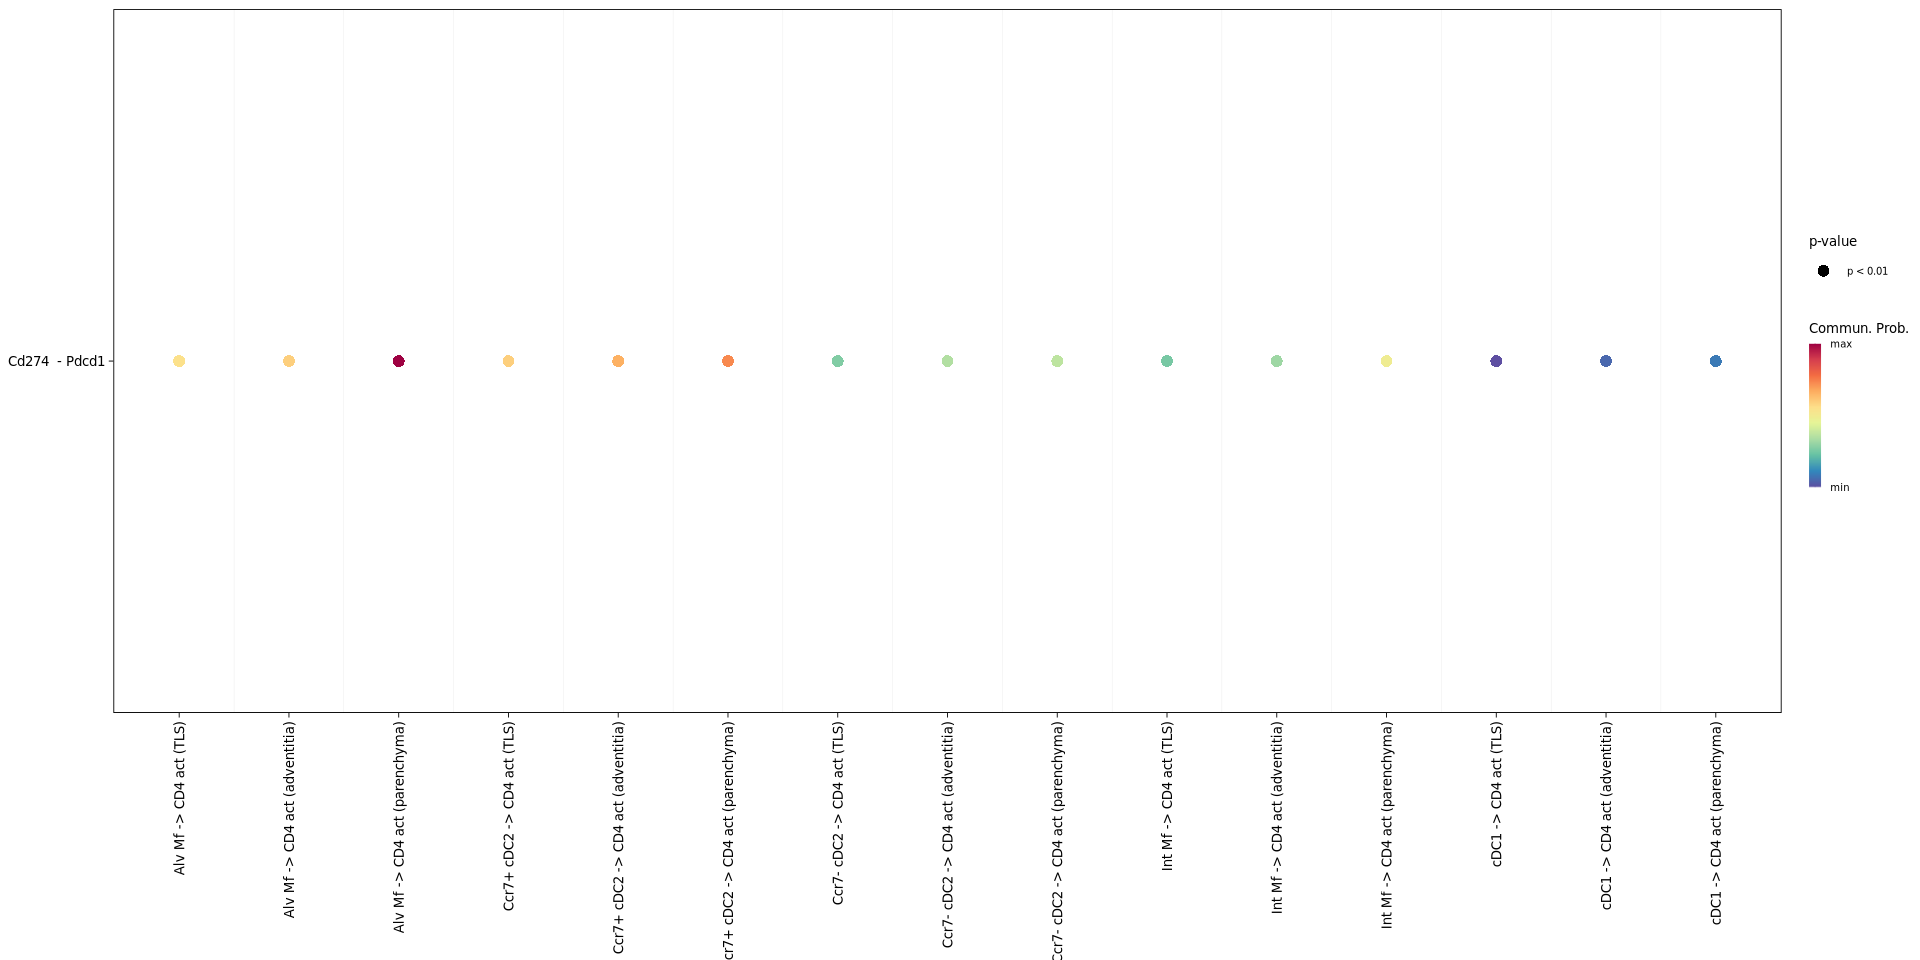

In [23]:
options(repr.plot.width = 16, repr.plot.height = 8)
netVisual_bubble(
  cellchat,
  sources.use = c('Int Mf', 'Alv Mf', 'Ccr7+ cDC2', 'Ccr7- cDC2', 'cDC1'),
  targets.use = c("CD4 act (TLS)", "CD4 act (adventitia)", "CD4 act (parenchyma)"),
  signaling = "PD-L1",  
    # pairLR.use = pairLR.use,
    remove.isolate = TRUE, 
)

interaction_name
<chr>
CCL5_CCR4
CCL4_CCR5
CCL5_CCR5
CCL3_CCR5
CCL19_CCR7
CCL21A_CCR7


Comparing communications on a single object 


Comparing communications on a single object 




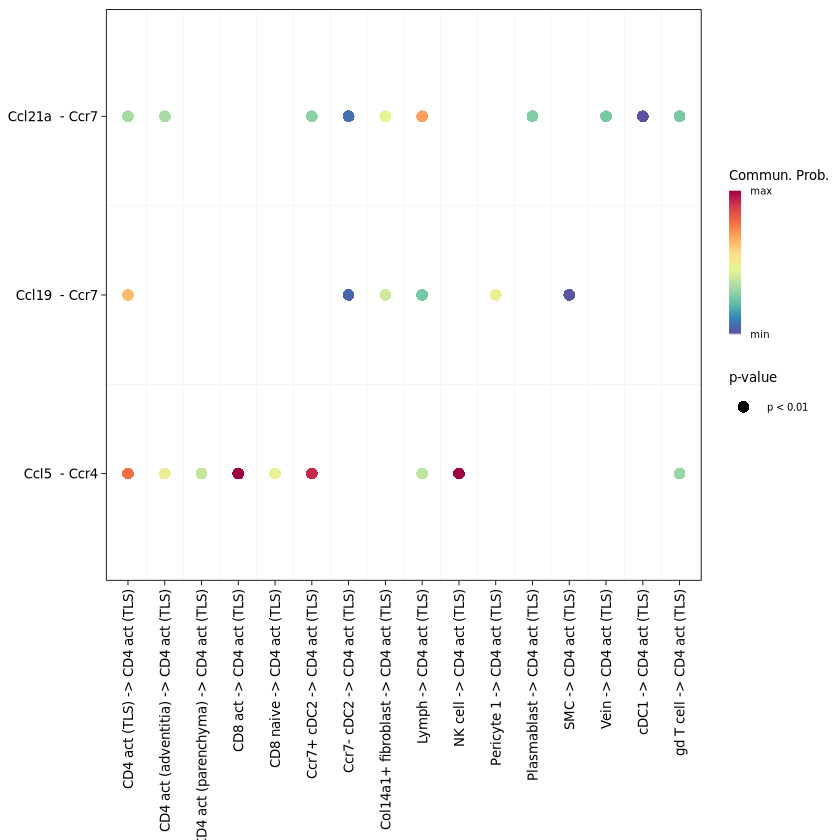

Comparing communications on a single object 




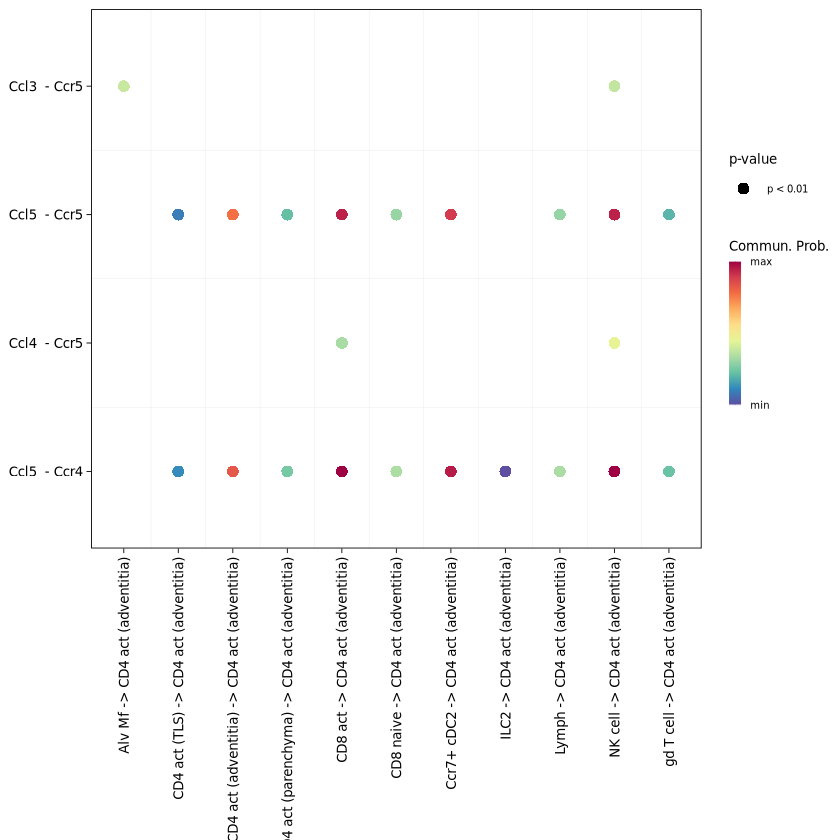

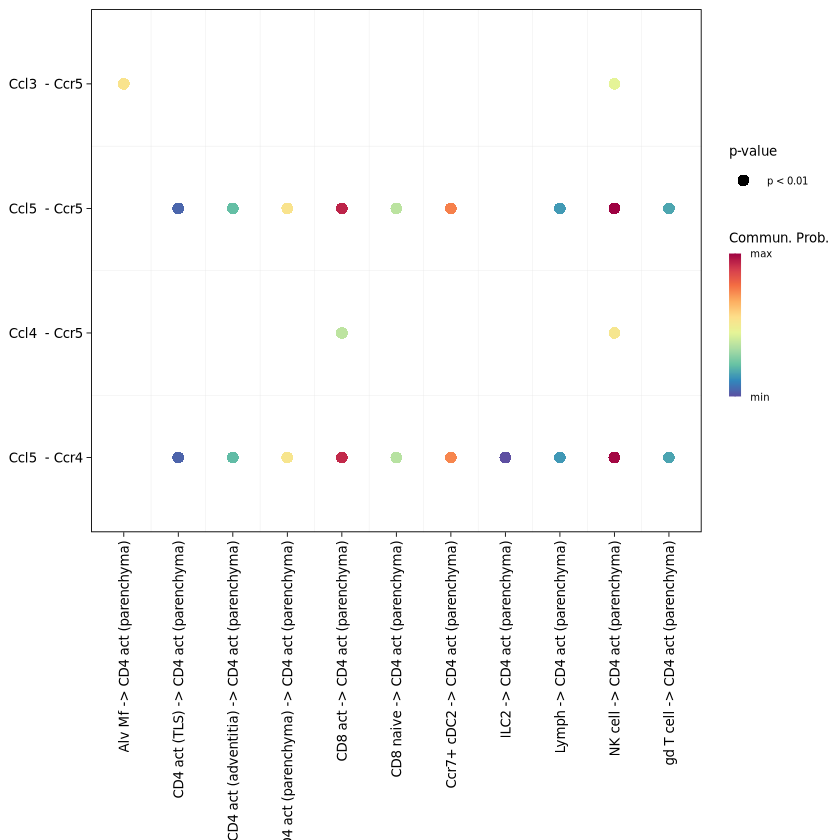

In [22]:
pairLR.use <- extractEnrichedLR(cellchat, signaling = c("CCL"))
pairLR.use

netVisual_bubble(
  cellchat,
  sources.use = NULL, # or your sender cells of interest
  targets.use = c("CD4 act (TLS)"),
  # signaling = "CXCL",  # OR any ligand/receptor/pathway
    pairLR.use = pairLR.use,
    remove.isolate = TRUE, 
)

netVisual_bubble(
  cellchat,
  sources.use = NULL, # or your sender cells of interest
  targets.use = c("CD4 act (adventitia)"),
  # signaling = "CXCL",  # OR any ligand/receptor/pathway
    pairLR.use = pairLR.use,
    remove.isolate = TRUE, 
)

netVisual_bubble(
  cellchat,
  sources.use = NULL, # or your sender cells of interest
  targets.use = c("CD4 act (parenchyma)"),
  # signaling = "CXCL",  # OR any ligand/receptor/pathway
    pairLR.use = pairLR.use,
    remove.isolate = TRUE, 
)

## Try some visualizations

In [17]:
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "net")

In [18]:
cellchat

An object of class CellChat created from a single dataset 
 480 genes.
 306938 cells. 
CellChat analysis of spatial data! The input spatial locations are 
               x_cent   y_cent
aaaajdak-1_1 345.6084 999.6942
aaaamenn-1_1 327.9950 982.5132
aaabhhpd-1_1 382.8660 920.0411
aaabkiak-1_1 371.0248 973.4794
aaabpjbp-1_1 366.9903 993.8553
aaadahja-1_1 366.1206 886.8061

In [19]:
pdf(file = file.path(cellchat_out_dir, paste0("cc_LR_",name,".pdf")))
plot(netAnalysis_signalingRole_heatmap(cellchat, pattern = "incoming"))
plot.new()
plot(netAnalysis_signalingRole_heatmap(cellchat, pattern = "outgoing"))
dev.off()

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'plot': Please run `netAnalysis_computeCentrality` to compute the network centrality scores! 


### plot interactions received 

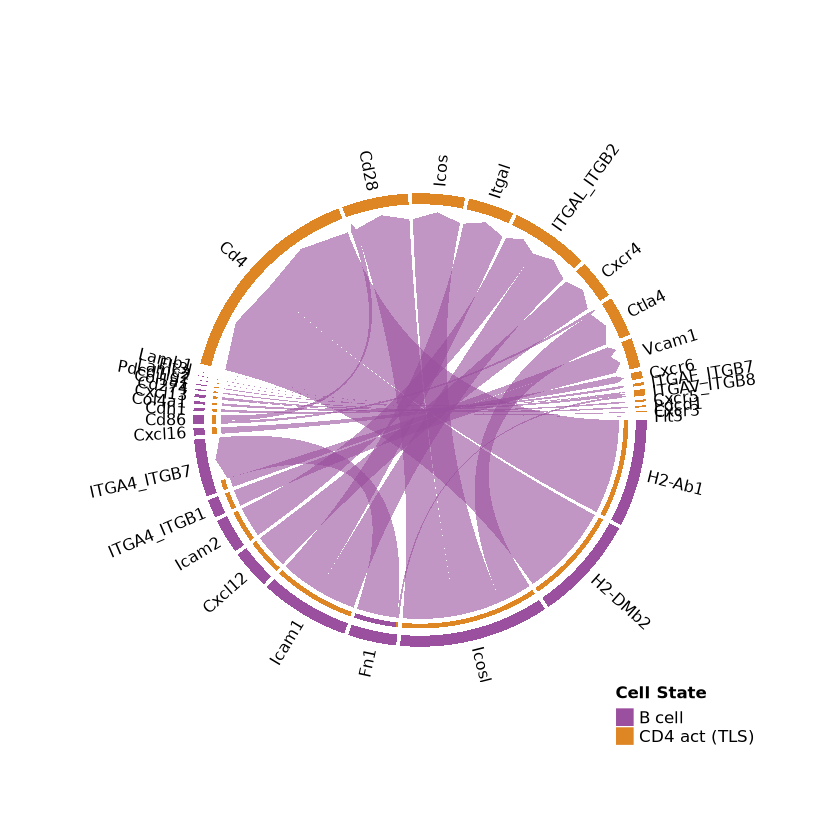

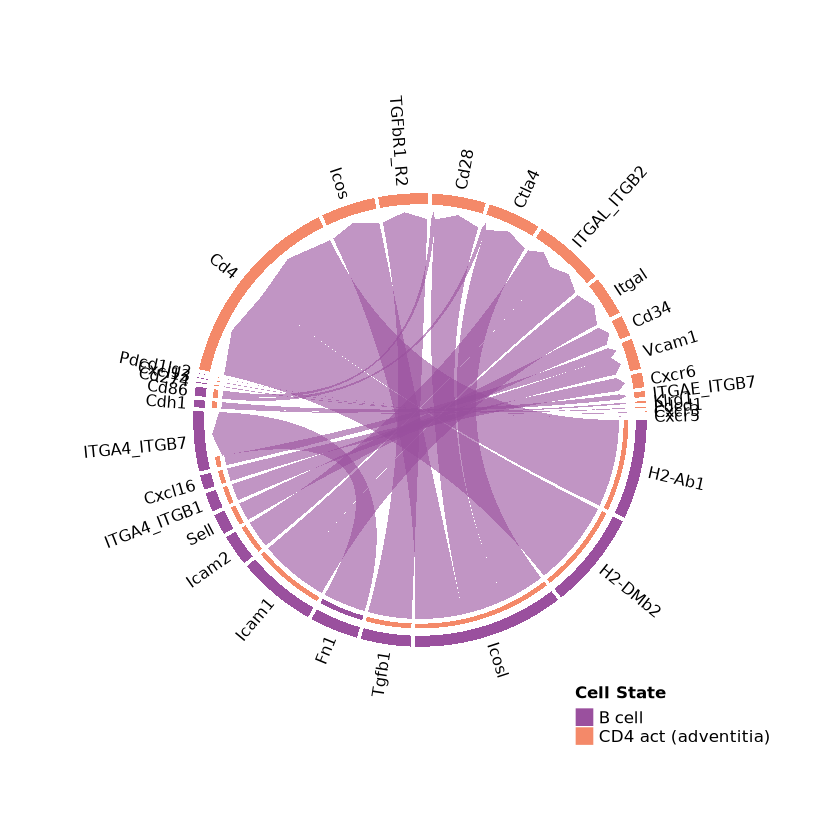

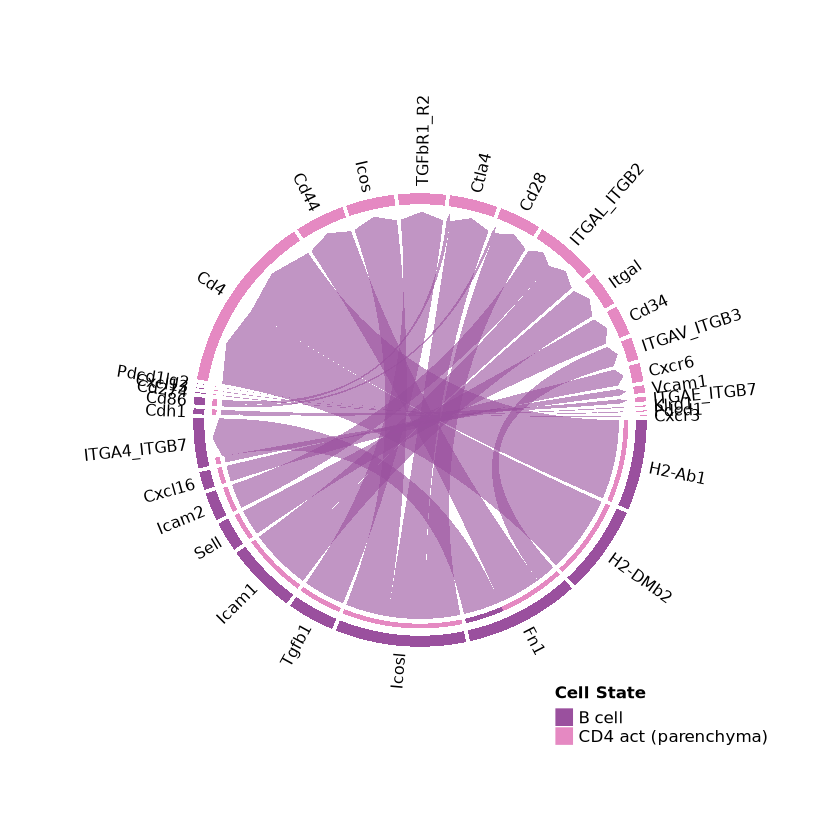

In [15]:
print(netVisual_chord_gene(cellchat, sources.use = c("B cell"), targets.use = c("CD4 act (TLS)")))
print(netVisual_chord_gene(cellchat, sources.use = c("B cell"), targets.use = c("CD4 act (adventitia)")))
print(netVisual_chord_gene(cellchat, sources.use = c("B cell"), targets.use = c("CD4 act (parenchyma)")))

## Figure 3g and extended data figure 3d

In [10]:
create_plots <- function(cellchat_out_dir, name) {
    path =  file.path(cellchat_out_dir, paste0("cellchat_",name,".rds"))
    cellchat <- readRDS(path)
    # # change the order of the labels
    # cellchat@meta$labels <- forcats::fct_relevel(cellchat@meta$labels, "P14 top", "P14 crypt", "P14 muscularis")
    # cellchat <- updateClusterLabels(cellchat, new.order = levels(cellchat@meta$labels))

    cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP")

    pdf(file = file.path(cellchat_out_dir, paste0("cc_",name,".pdf")))
    plot(netAnalysis_signalingRole_heatmap(cellchat, pattern = "incoming"))
    plot.new()
    plot(netAnalysis_signalingRole_heatmap(cellchat, pattern = "outgoing"))
    dev.off()
}

In [11]:
name = "HDM_day3"
create_plots(cellchat_out_dir, name)

pdf 
  2

[[1]]

[[2]]



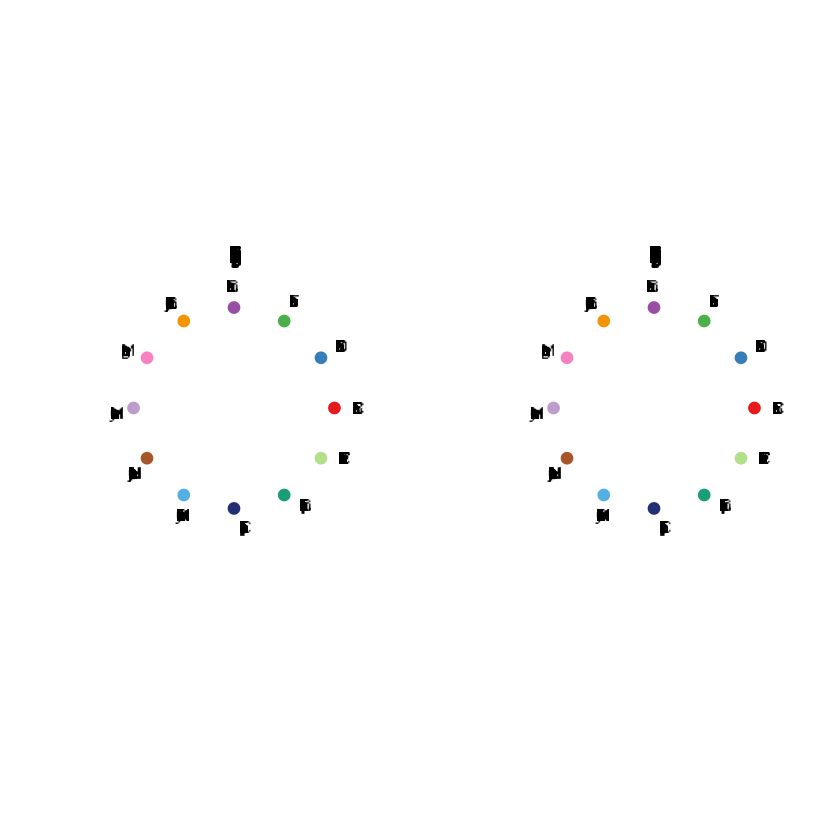

[[1]]

[[2]]

[[3]]

[[1]]

[[2]]

[[3]]



[[1]]

[[2]]

[[3]]


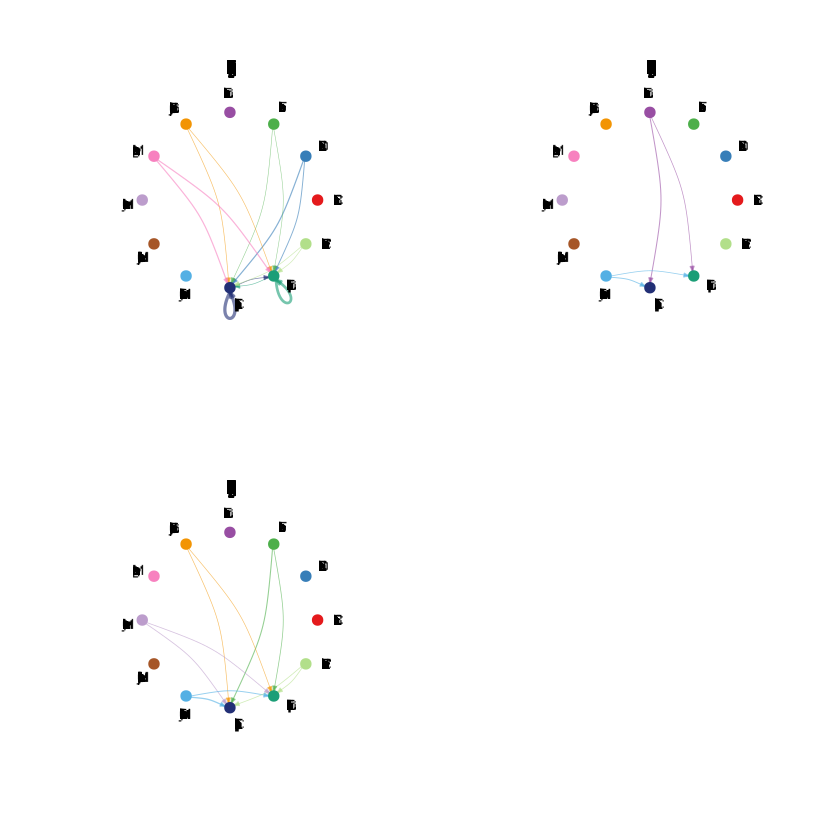

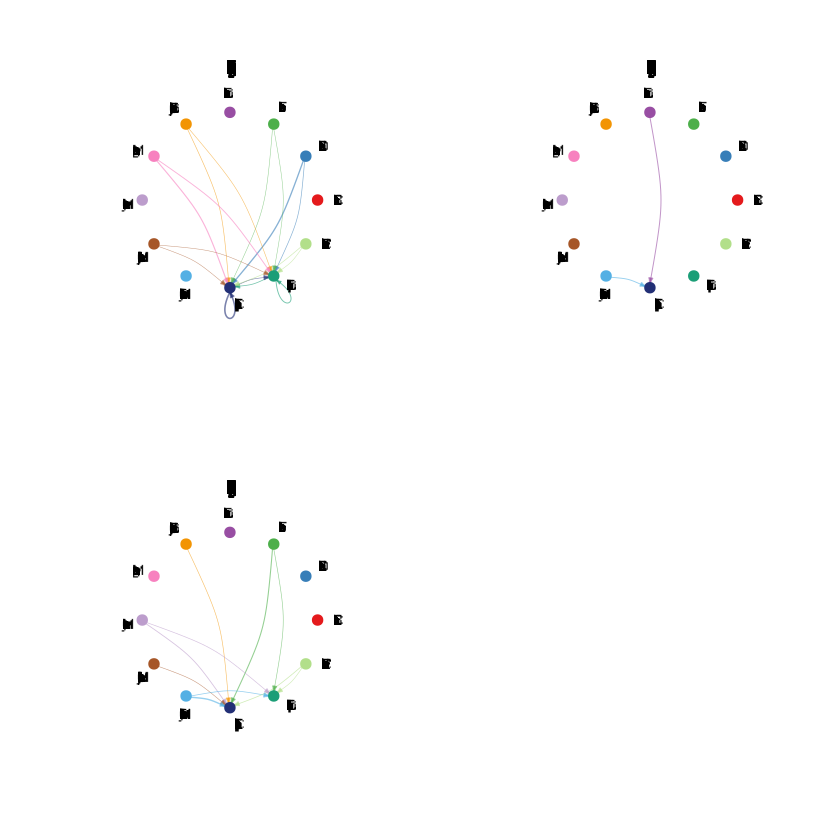

In [6]:
# Loop over different datasets
for (dataset in c("d7", "d30", "full")) {
  # Load the CellChat object for the current dataset
  cellchat <- readRDS(paste0("tmp/cellchat_", dataset, ".rds"))
  pathways.show <- c("TGFb") 
  
  vertex.receiver <- which(levels(cellchat@idents) %in% c("T Cells (epithelial)", "T Cells (stromal)", "T Cells (neither)"))
  
  # Create the visualization
  p <- netVisual_individual(cellchat, signaling = pathways.show, layout = 'circle', targets.use=vertex.receiver)
  
  # Save as PDF with dataset-specific filename
  pdf(paste0("out/TGFb_network_visualization_", dataset, ".pdf"), width = 8, height = 8)
  print(p)
  dev.off()
  
  # Store the plot for the last dataset to display in notebook
  if (dataset == "full") {
    p_display <- p
  }
}

# Set p to the last plot for display in the notebook
p <- p_display

# Display in notebook
p


[[1]]

[[2]]

[[3]]



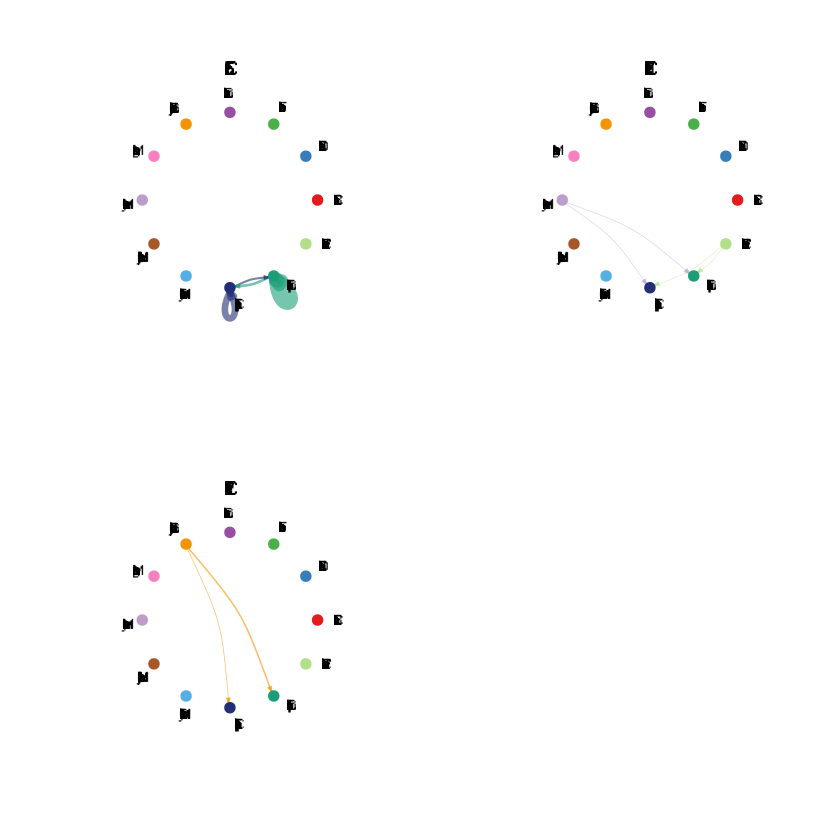

[[1]]

[[2]]

[[3]]



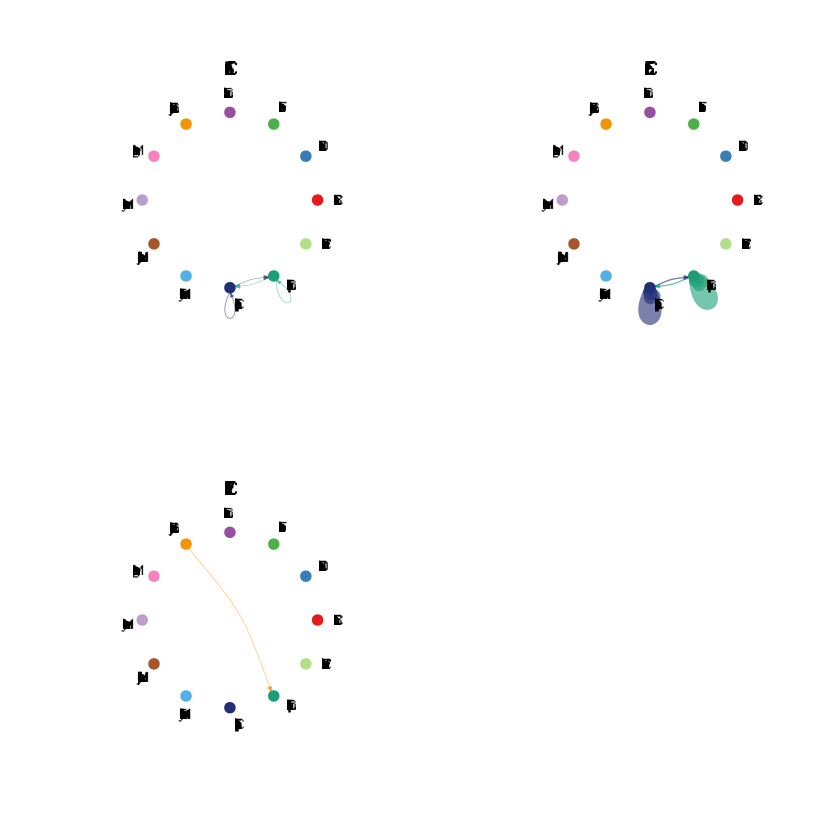

[[1]]

[[2]]



[[1]]

[[2]]


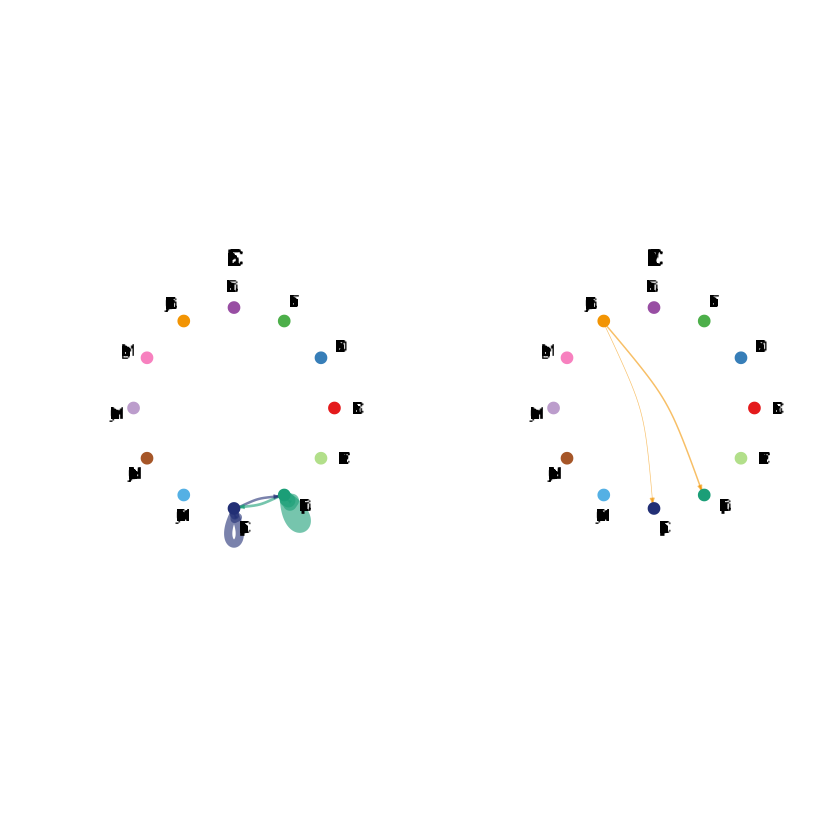

In [7]:
# Loop over different datasets
for (dataset in c("d7", "d30", "full")) {
  # Load the CellChat object for the current dataset
  cellchat <- readRDS(paste0("tmp/cellchat_", dataset, ".rds"))
  pathways.show <- c("CCL") 
  
  vertex.receiver <- which(levels(cellchat@idents) %in% c("T Cells (epithelial)", "T Cells (stromal)", "T Cells (neither)"))
  
  # Create the visualization
  p <- netVisual_individual(cellchat, signaling = pathways.show, layout = 'circle', targets.use=vertex.receiver)
  
  # Save as PDF with dataset-specific filename
  pdf(paste0("out/CCL_network_visualization_", dataset, ".pdf"), width = 8, height = 8)
  print(p)
  dev.off()
  
  # Store the plot for the last dataset to display in notebook
  if (dataset == "full") {
    p_display <- p
  }
}

# Set p to the last plot for display in the notebook
p <- p_display

# Display in notebook
p


[[1]]

[[2]]

[[3]]

[[4]]



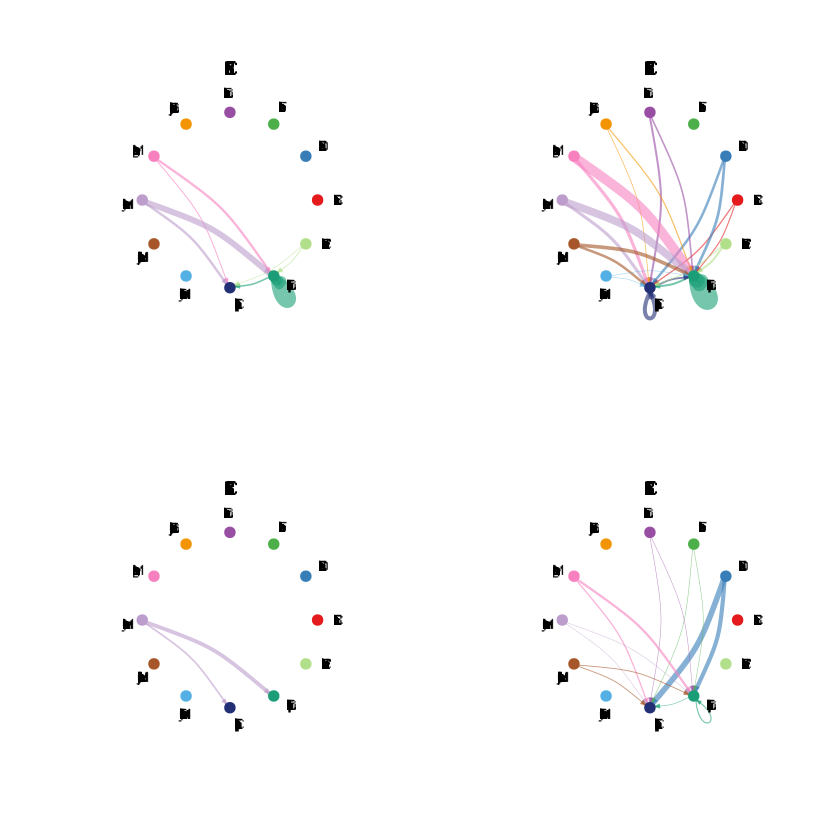

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]



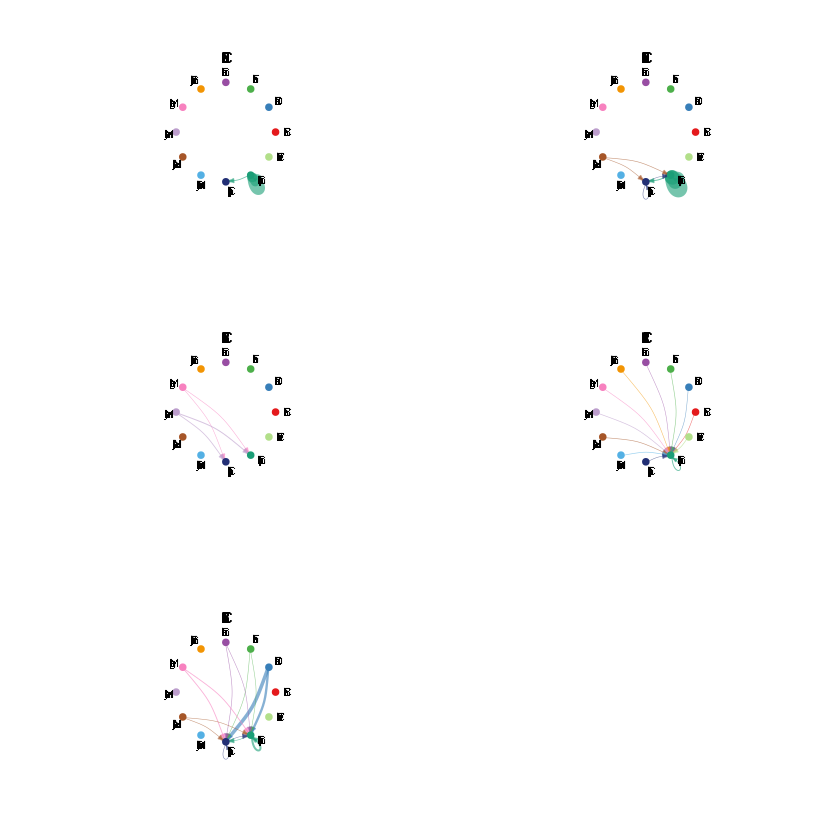

[[1]]

[[2]]

[[3]]

[[4]]



[[1]]

[[2]]

[[3]]

[[4]]


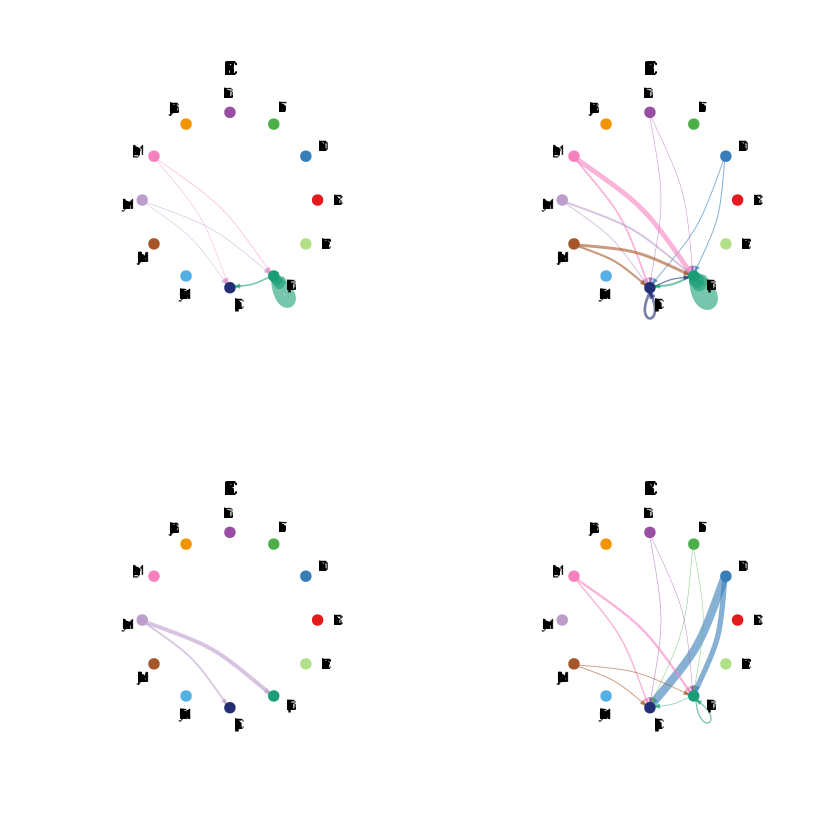

In [8]:
# Loop over different datasets
for (dataset in c("d7", "d30", "full")) {
  # Load the CellChat object for the current dataset
  cellchat <- readRDS(paste0("tmp/cellchat_", dataset, ".rds"))
  pathways.show <- c("CXCL") 
  
  vertex.receiver <- which(levels(cellchat@idents) %in% c("T Cells (epithelial)", "T Cells (stromal)", "T Cells (neither)"))
  
  # Create the visualization
  p <- netVisual_individual(cellchat, signaling = pathways.show, layout = 'circle', targets.use=vertex.receiver)
  
  # Save as PDF with dataset-specific filename
  pdf(paste0("out/CXCL_network_visualization_", dataset, ".pdf"), width = 8, height = 8)
  print(p)
  dev.off()
  
  # Store the plot for the last dataset to display in notebook
  if (dataset == "full") {
    p_display <- p
  }
}

# Set p to the last plot for display in the notebook
p <- p_display

# Display in notebook
p


[[1]]

[[2]]

[[3]]

[[4]]



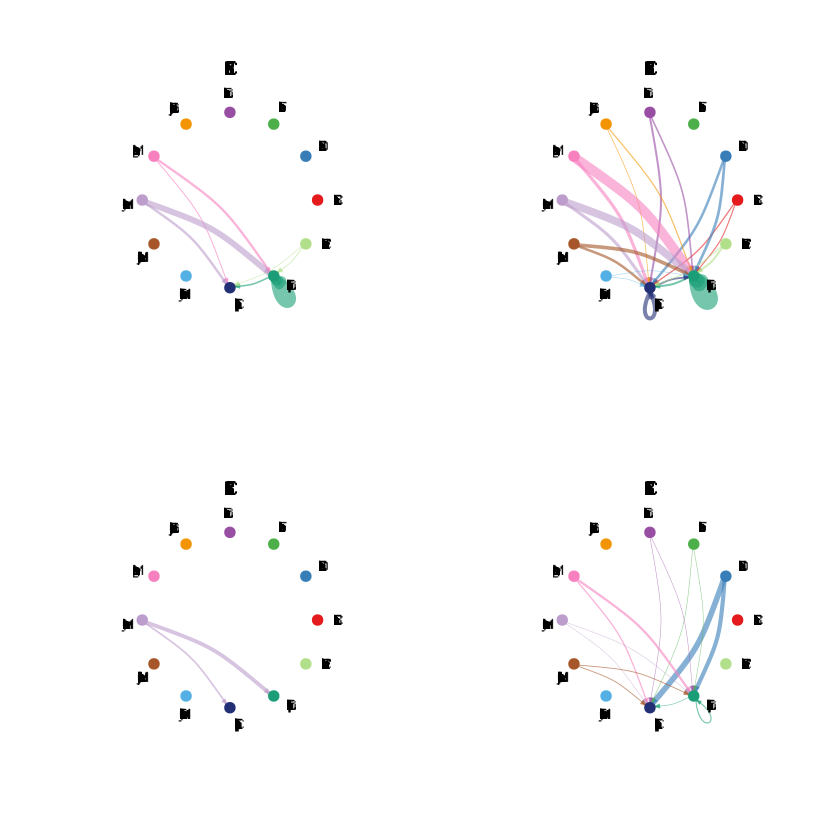

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]



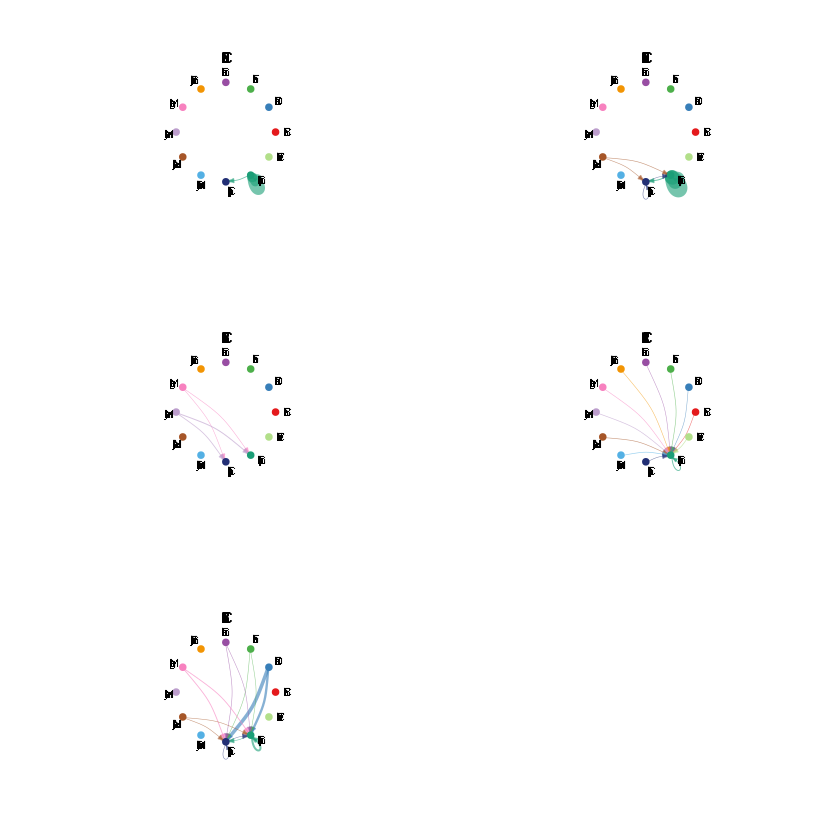

[[1]]

[[2]]

[[3]]

[[4]]



[[1]]

[[2]]

[[3]]

[[4]]


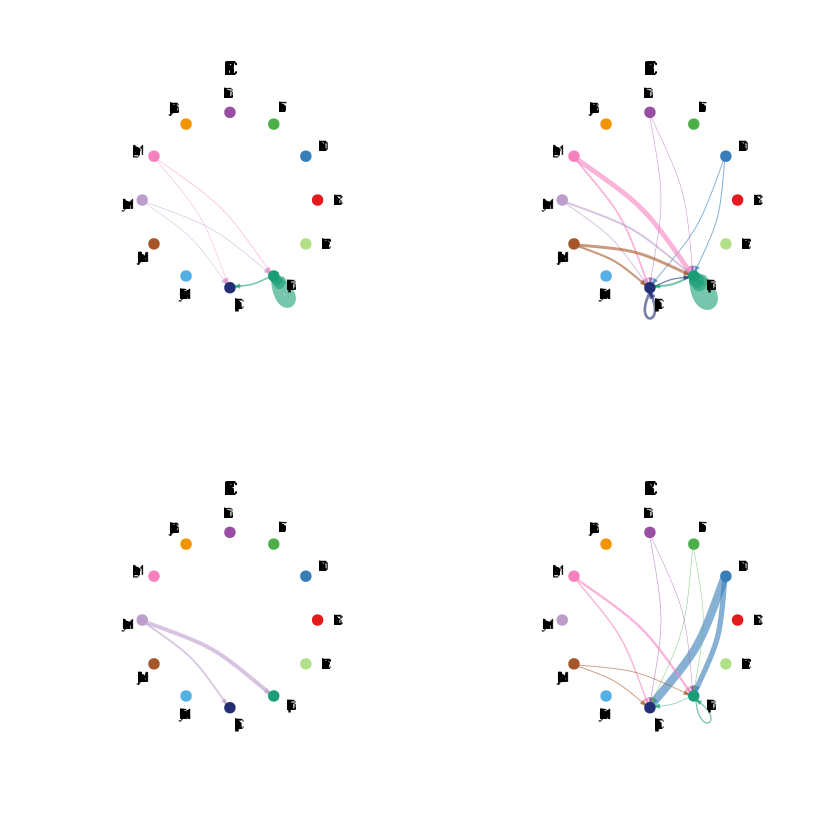

In [9]:
# Loop over different datasets
for (dataset in c("d7", "d30", "full")) {
  # Load the CellChat object for the current dataset
  cellchat <- readRDS(paste0("tmp/cellchat_", dataset, ".rds"))
  pathways.show <- c("CXCL") 
  
  vertex.receiver <- which(levels(cellchat@idents) %in% c("T Cells (epithelial)", "T Cells (stromal)", "T Cells (neither)"))
  
  # Create the visualization
  p <- netVisual_individual(cellchat, signaling = pathways.show, layout = 'circle', targets.use=vertex.receiver)
  
  # Save as PDF with dataset-specific filename
  pdf(paste0("out/CXCL_network_visualization_", dataset, ".pdf"), width = 8, height = 8)
  print(p)
  dev.off()
  
  # Store the plot for the last dataset to display in notebook
  if (dataset == "full") {
    p_display <- p
  }
}

# Set p to the last plot for display in the notebook
p <- p_display

# Display in notebook
p


[[1]]



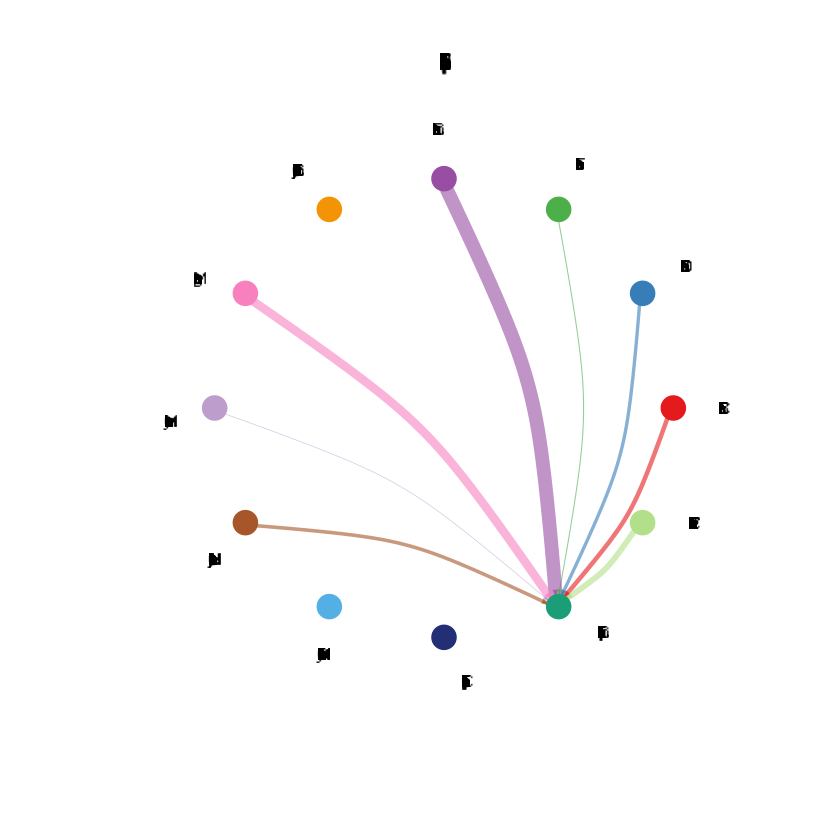

[[1]]

[[2]]

[[3]]

[[1]]

[[2]]

[[3]]



[[1]]

[[2]]

[[3]]


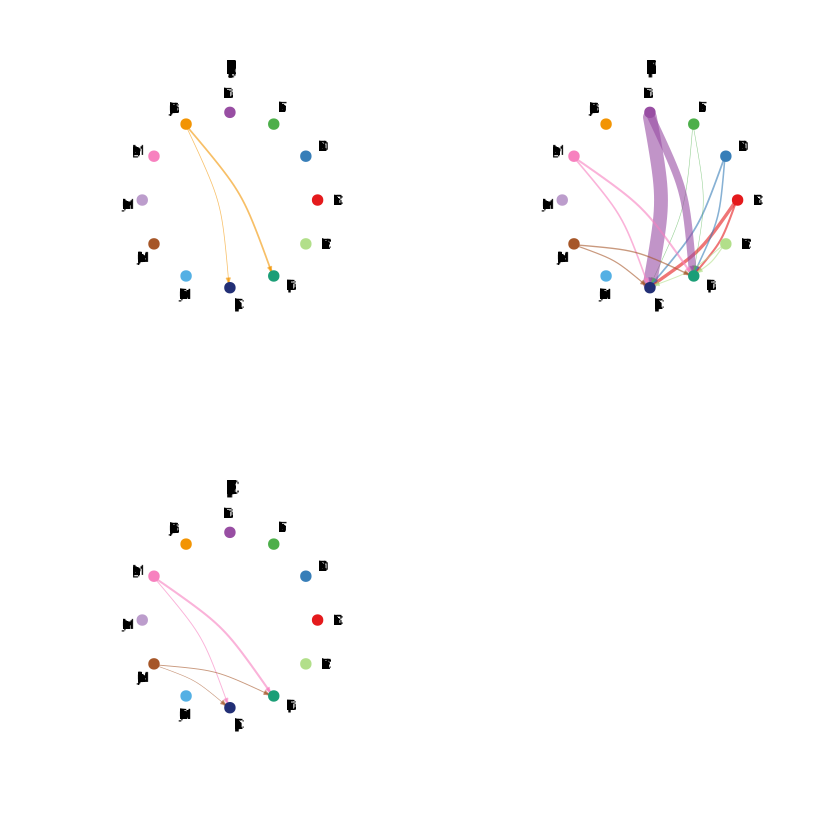

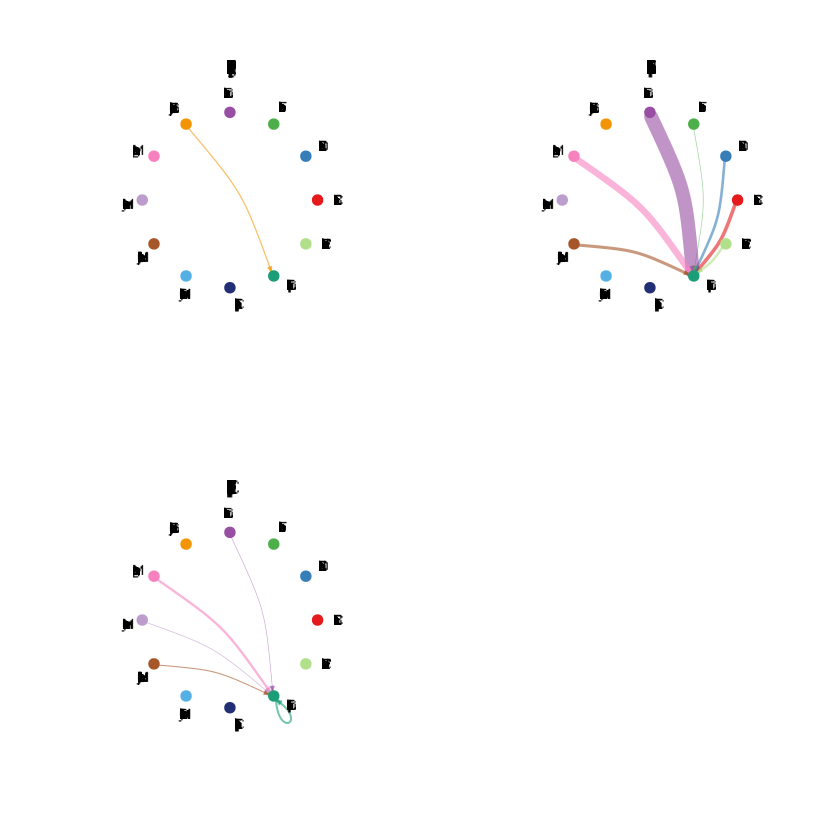

In [10]:
# Loop over different datasets
for (dataset in c("d7", "d30", "full")) {
  # Load the CellChat object for the current dataset
  cellchat <- readRDS(paste0("tmp/cellchat_", dataset, ".rds"))
  pathways.show <- c("IL2") 
  
  vertex.receiver <- which(levels(cellchat@idents) %in% c("T Cells (epithelial)", "T Cells (stromal)", "T Cells (neither)"))
  
  # Create the visualization
  p <- netVisual_individual(cellchat, signaling = pathways.show, layout = 'circle', targets.use=vertex.receiver)
  
  # Save as PDF with dataset-specific filename
  pdf(paste0("out/IL2_network_visualization_", dataset, ".pdf"), width = 8, height = 8)
  print(p)
  dev.off()
  
  # Store the plot for the last dataset to display in notebook
  if (dataset == "full") {
    p_display <- p
  }
}

# Set p to the last plot for display in the notebook
p <- p_display

# Display in notebook
p
